<a href="https://colab.research.google.com/github/debobratopaul/Heart-Disease-Diagnostic-Analysis/blob/main/HeartDiseaseProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name-Heart Disease Diagnostic Analysis**

**Problem Statement**-Health is real wealth in the pandemic time we all realized the brute effects of COVID-19 on all irrespective of status. You must analyze this health and medical data for better preparation


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Heart Disease data.csv')

**Dataset First View**

In [4]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


The attributes of this data set are disease

**Dataset Rows & Columns count**

In [5]:
shape_of_df = df.shape
print(f'Number of Rows = {shape_of_df[0]} and Number of Columns = {shape_of_df[1]}')

Number of Rows = 1025 and Number of Columns = 14


**Dataset Information**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# Dataset Duplicate Value Count
df_duplicate = df[df.duplicated()]
df_duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
# Missing Values/Null Values Count
missing_values_count = df.isnull().sum()
print(missing_values_count)
type(missing_values_count)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


pandas.core.series.Series

Observation: None of the variable contains of the null values

**Changing column type for 'sex' and 'target' to category from int.**

In [9]:
# Convert 'sex' column to categorical
df['sex'] = df['sex'].map({1: 'female', 0: 'male'}).astype('category')

# Convert 'target' column to categorical
df['target'] = df['target'].map({1: 'present', 0: 'absent'}).astype('category')

# Display the first few rows to verify the changes
print(df.head())

   age     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   52  female   0       125   212    0        1      168      0      1.0   
1   53  female   0       140   203    1        0      155      1      3.1   
2   70  female   0       145   174    0        1      125      1      2.6   
3   61  female   0       148   203    0        1      161      0      0.0   
4   62    male   0       138   294    1        1      106      0      1.9   

   slope  ca  thal  target  
0      2   2     3  absent  
1      0   0     3  absent  
2      0   0     3  absent  
3      2   1     3  absent  
4      1   3     2  absent  


Counts of Heart Disease Presence:
target
present    526
absent     499
Name: count, dtype: int64


<ipython-input-10-40af9a0addfd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette={'absent': 'blue', 'present': 'orange'})


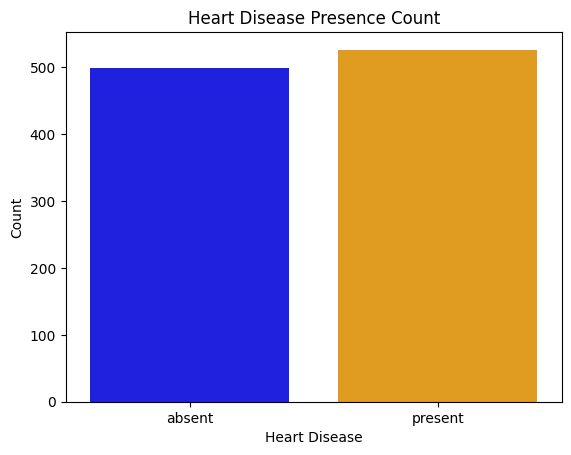

In [10]:
# Print the counts of 'absent' and 'present'
counts = df['target'].value_counts()
print("Counts of Heart Disease Presence:")
print(counts)

# Create the bar chart with different colors
sns.countplot(data=df, x='target', palette={'absent': 'blue', 'present': 'orange'})
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Heart Disease Presence Count')
plt.show()

**In the given sample data the number of people with heart disease are 526 and without heart disease are 499**

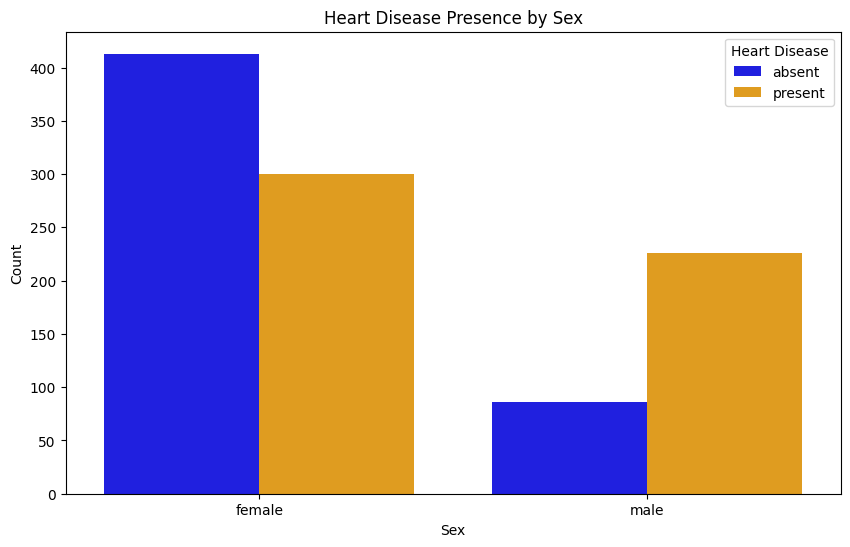

In [11]:
# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sex', hue='target', palette={'absent': 'blue', 'present': 'orange'})
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Heart Disease Presence by Sex')
plt.legend(title='Heart Disease')
plt.show()

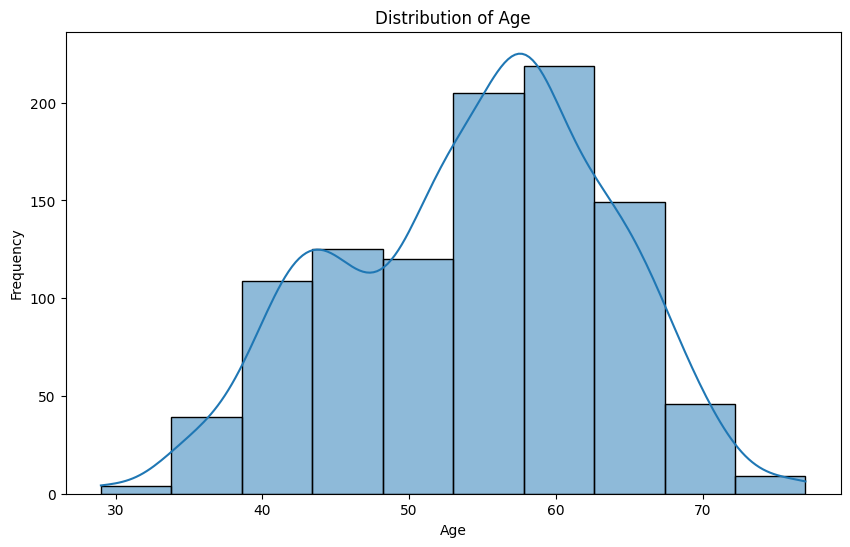

In [12]:
# Create a histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [13]:
X1=len(df[(df['age']<40)])
X2=len(df[(df['age']>40) & (df['age']<55)])
X3=len(df[df['age']>55])
print('The number of the people below the age of 40 : ',X1)
print('The number of the people between the age group 41 to 54 :',X2)
print('The number of the prople above age 55 :',X3)
print("Minimum age is ",np.min(df['age']))
print("Maximum age is ",np.max(df['age']))
print("Mean of age is",round(np.mean(df['age']),1))

The number of the people below the age of 40 :  57
The number of the people between the age group 41 to 54 : 408
The number of the prople above age 55 : 519
Minimum age is  29
Maximum age is  77
Mean of age is 54.4


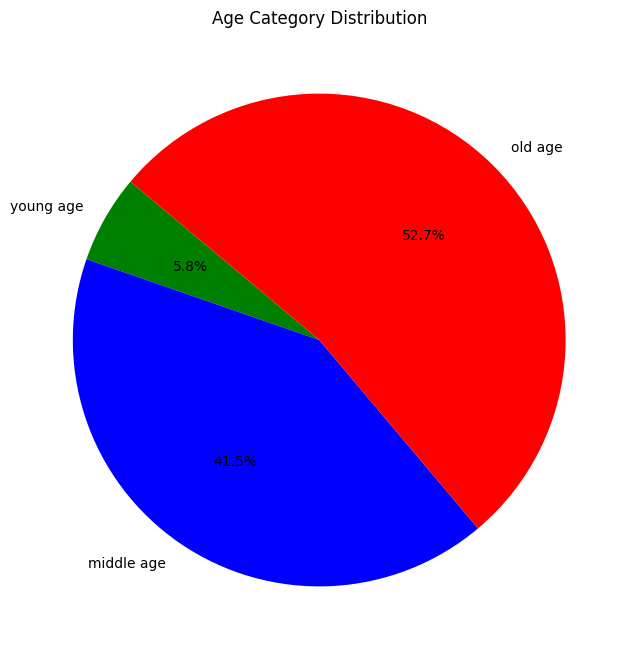

In [14]:
# Data for the pie chart
Y = [X1, X2, X3]
X = ['young age', 'middle age', 'old age']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(Y, labels=X, autopct='%1.1f%%', colors=['green', 'blue', 'red'], startangle=140)
plt.title('Age Category Distribution')
plt.show()

**The given data has more number of people in old age group**

In [15]:
def age_category (value):
    if value<=40:
        return 'young age'
    elif value>40 and value<55:
        return 'middle age'
    else :
        return 'old age'
df['Age_category']=df['age'].apply(age_category)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_category
0,52,female,0,125,212,0,1,168,0,1.0,2,2,3,absent,middle age
1,53,female,0,140,203,1,0,155,1,3.1,0,0,3,absent,middle age
2,70,female,0,145,174,0,1,125,1,2.6,0,0,3,absent,old age
3,61,female,0,148,203,0,1,161,0,0.0,2,1,3,absent,old age
4,62,male,0,138,294,1,1,106,0,1.9,1,3,2,absent,old age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,female,1,140,221,0,1,164,1,0.0,2,0,2,present,old age
1021,60,female,0,125,258,0,0,141,1,2.8,1,1,3,absent,old age
1022,47,female,0,110,275,0,0,118,1,1.0,1,1,2,absent,middle age
1023,50,male,0,110,254,0,0,159,0,0.0,2,0,2,present,middle age


In [16]:
# Print the counts of heart disease presence by age category
counts = df.groupby(['Age_category', 'target']).size().reset_index(name='count')
print(counts)

  Age_category   target  count
0   middle age   absent    135
1   middle age  present    273
2      old age   absent    341
3      old age  present    208
4    young age   absent     23
5    young age  present     45


<ipython-input-16-2ab7c934a884>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['Age_category', 'target']).size().reset_index(name='count')


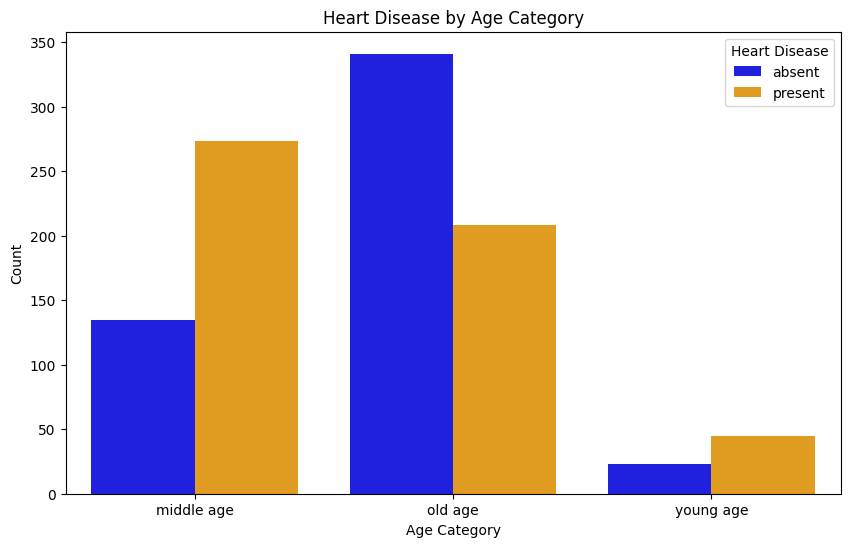

In [17]:
# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_category', hue='target', palette={'absent': 'blue', 'present': 'orange'})
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Heart Disease by Age Category')
plt.legend(title='Heart Disease')
plt.show()

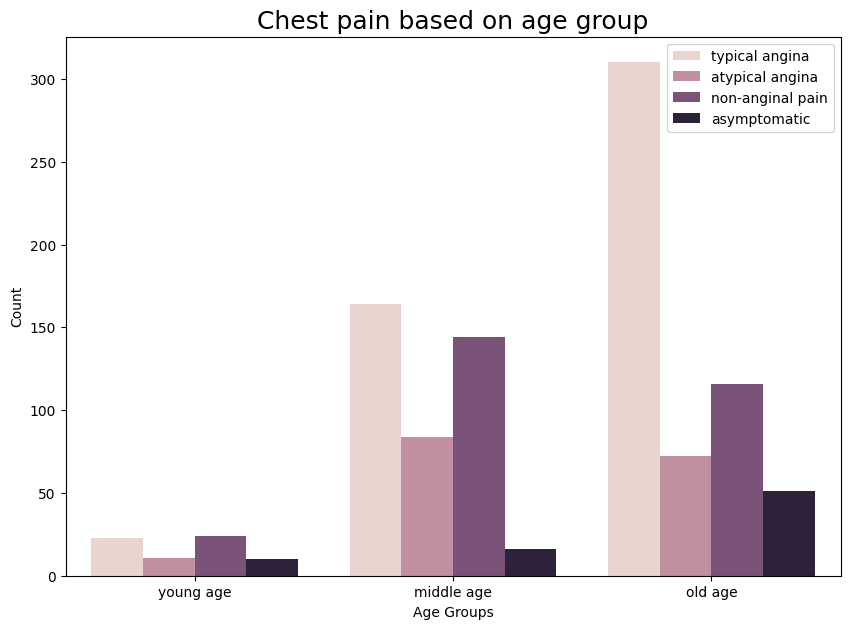

In [18]:
plt.figure(figsize=(10,7))
plt.title("Chest pain based on age group", fontsize=18)

plt.xlabel('Age Groups')
plt.ylabel('Count')
sns.countplot(x='Age_category',data=df,hue='cp',order=['young age','middle age','old age'])
plt.legend(labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'], loc='upper right')

**It is seen that there are more people with typical angina type of chest pain in every age group.**

<ipython-input-19-588382cacb1d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_present, x='cp', palette='viridis')


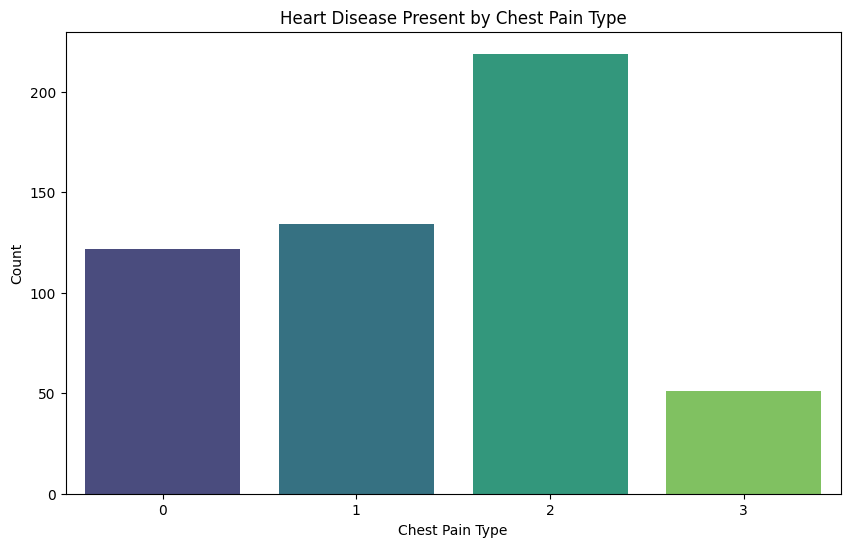

Counts of Heart Disease Present by Chest Pain Type:
cp
0    122
1    134
2    219
3     51
Name: count, dtype: int64


In [19]:
# Filter the dataframe to include only rows where heart disease is present
df_present = df[df['target'] == 'present']

# Create a bar plot to visualize the number of cases with heart disease according to chest pain type
plt.figure(figsize=(10, 6))
sns.countplot(data=df_present, x='cp', palette='viridis')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Heart Disease Present by Chest Pain Type')
plt.show()

# Print the counts of heart disease present by chest pain type
counts = df_present['cp'].value_counts().sort_index()
print("Counts of Heart Disease Present by Chest Pain Type:")
print(counts)

**It is observed that people having asymptomatic chest pain have higher chance of heart diseases.**

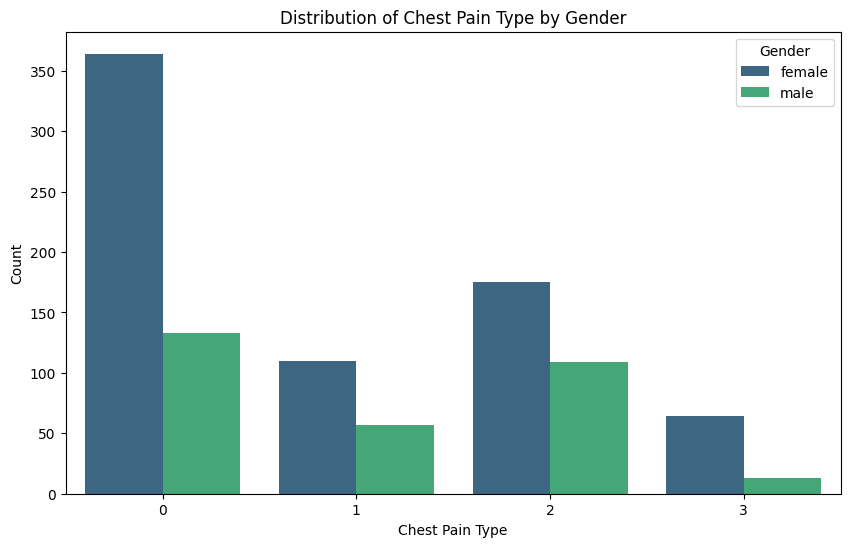

Counts of Chest Pain Type by Gender:
cp        0    1    2   3
sex                      
female  364  110  175  64
male    133   57  109  13


<ipython-input-20-b7f2021d4a1e>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['sex', 'cp']).size().unstack(fill_value=0)


In [20]:
# Create a bar plot to visualize the number of cases by chest pain type and gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cp', hue='sex', palette='viridis')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Type by Gender')
plt.legend(title='Gender')
plt.show()

# Print the counts of chest pain type by gender
counts = df.groupby(['sex', 'cp']).size().unstack(fill_value=0)
print("Counts of Chest Pain Type by Gender:")
print(counts)

**There are more females and males with typical angina type chest pain.**

<ipython-input-21-eef0518f7494>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='trestbps', data=df, palette={'male': 'blue', 'female': 'pink'})


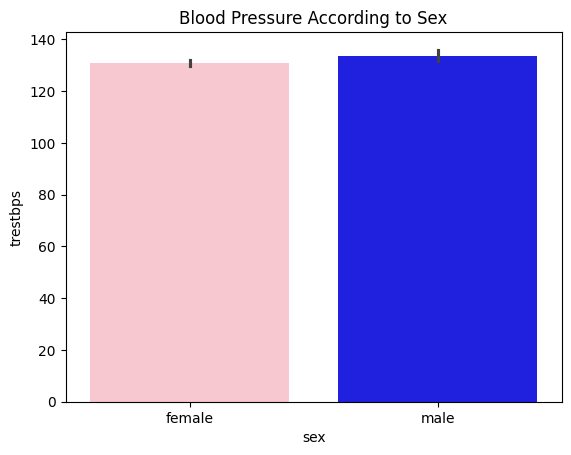

In [21]:
# Example with custom colors
sns.barplot(x='sex', y='trestbps', data=df, palette={'male': 'blue', 'female': 'pink'})

plt.title('Blood Pressure According to Sex')
plt.show()

**It is seen that male population has slightly higher BP**

Text(0.5, 1.0, 'Blood pressure accoring to the age and sex of a person')

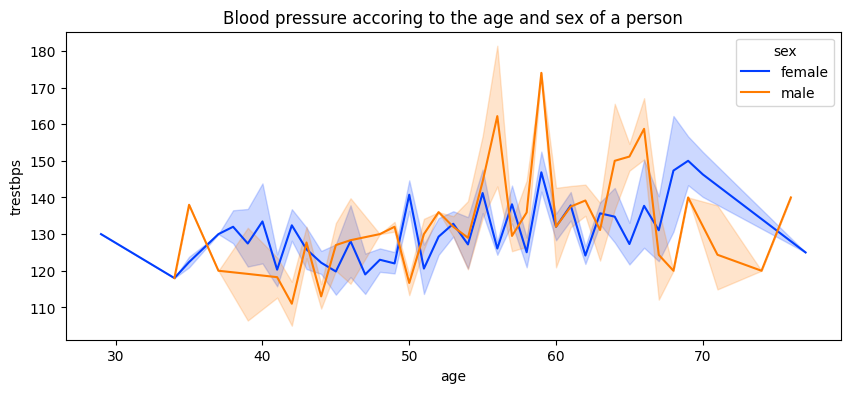

In [22]:
plt.figure(figsize=(10,4))

ax1=sns.lineplot(x='age',y='trestbps',data =df,hue='sex',palette='bright')
plt.title('Blood pressure accoring to the age and sex of a person')

**Here we observed that the blood pressure is normal from 30 to 50 and after 50 it increases gradually to age of 60. And after age of 55 it is fluctuating drastically.**

<ipython-input-23-89c8e50f1eb3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='chol', data=df, palette={'male': 'blue', 'female': 'pink'})


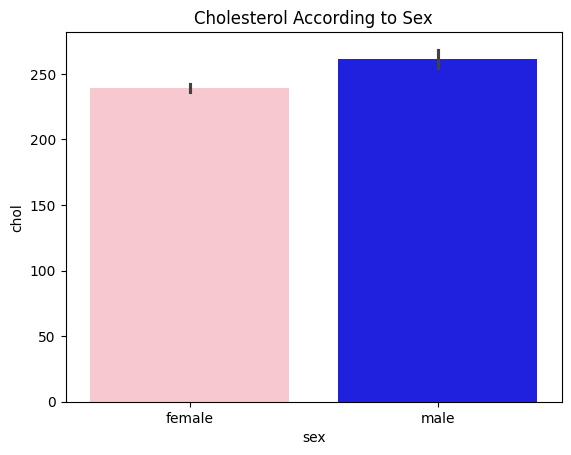

In [23]:
# Example with custom colors
sns.barplot(x='sex', y='chol', data=df, palette={'male': 'blue', 'female': 'pink'})

plt.title('Cholesterol According to Sex')
plt.show()

**Male population has higher cholesterol**

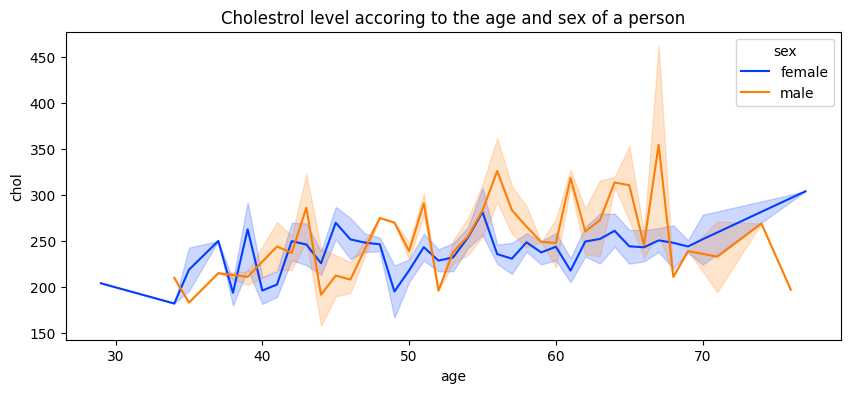

In [24]:
plt.figure(figsize=(10,4))
sns.lineplot(x='age',y='chol',data =df,hue='sex',palette='bright')
plt.title('Cholestrol level accoring to the age and sex of a person')
plt.show()

**It can be seen That the cholestrol level slightly starts increasing at the age after 45 It shows more flactualtion in male than female**

<ipython-input-25-9b1ccb0a74f8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cp', y='trestbps', data=df_present, palette='viridis')


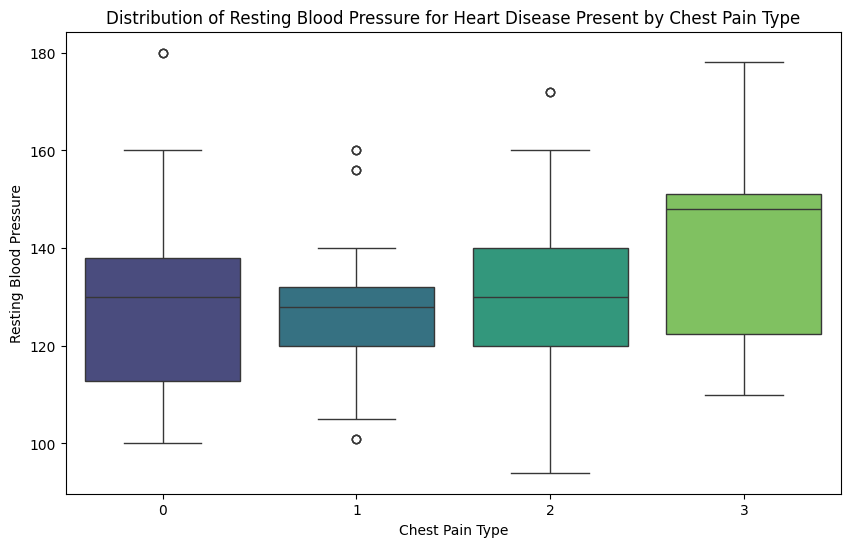

Summary Statistics of Resting Blood Pressure for Heart Disease Present by Chest Pain Type:
    count        mean        std    min     25%    50%    75%    max
cp                                                                  
0   122.0  127.778689  16.633886  100.0  112.75  130.0  138.0  180.0
1   134.0  126.074627  11.670686  101.0  120.00  128.0  132.0  160.0
2   219.0  128.949772  15.998057   94.0  120.00  130.0  140.0  172.0
3    51.0  142.352941  19.241438  110.0  122.50  148.0  151.0  178.0


In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cp', y='trestbps', data=df_present, palette='viridis')
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood Pressure')
plt.title('Distribution of Resting Blood Pressure for Heart Disease Present by Chest Pain Type')
plt.show()

# Print summary statistics of trestbps for heart disease present
summary_stats = df_present.groupby('cp')['trestbps'].describe()
print("Summary Statistics of Resting Blood Pressure for Heart Disease Present by Chest Pain Type:")
print(summary_stats)

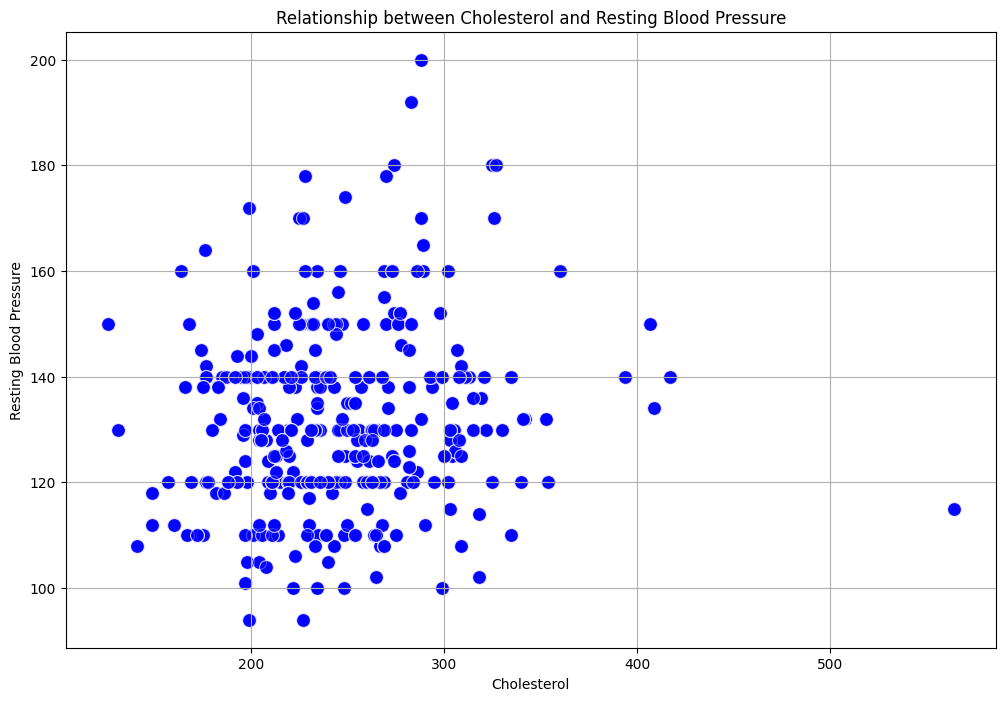

Correlation coefficient between Cholesterol and Resting Blood Pressure: 0.13


In [26]:
# Create a scatter plot to visualize the relationship between cholesterol and blood pressure
plt.figure(figsize=(12, 8))
sns.scatterplot(x='chol', y='trestbps', data=df, color='blue', s=100, alpha=0.7)
plt.xlabel('Cholesterol')
plt.ylabel('Resting Blood Pressure')
plt.title('Relationship between Cholesterol and Resting Blood Pressure')
plt.grid(True)
plt.show()

# Print the correlation coefficient between cholesterol and blood pressure
correlation = df[['chol', 'trestbps']].corr().iloc[0, 1]
print(f"Correlation coefficient between Cholesterol and Resting Blood Pressure: {correlation:.2f}")

**With increase in cholesterol the Blood Pressure also increases**

<Axes: xlabel='age', ylabel='oldpeak'>

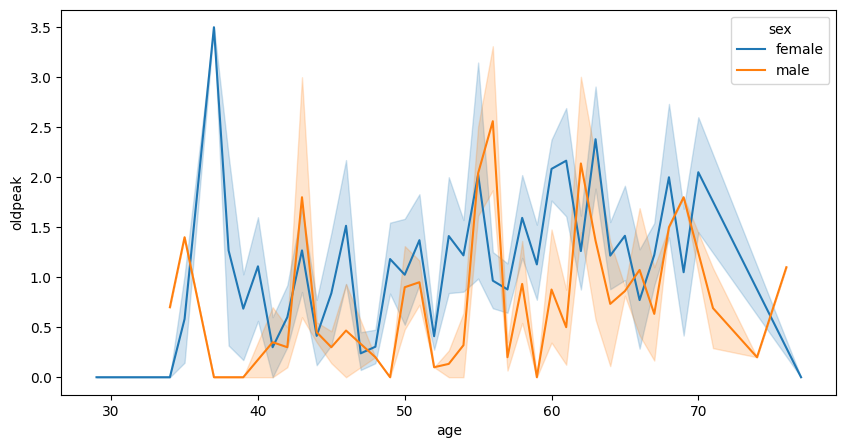

In [27]:
# Line plot for ST depression vs age using matplotlib and seaborn
plt.figure(figsize=(10,5))
sns.lineplot(x='age', y='oldpeak',data=df,hue='sex',color='red')

**For female depression is more between age 35-40 but for male the depression rate increases as the age increases.**

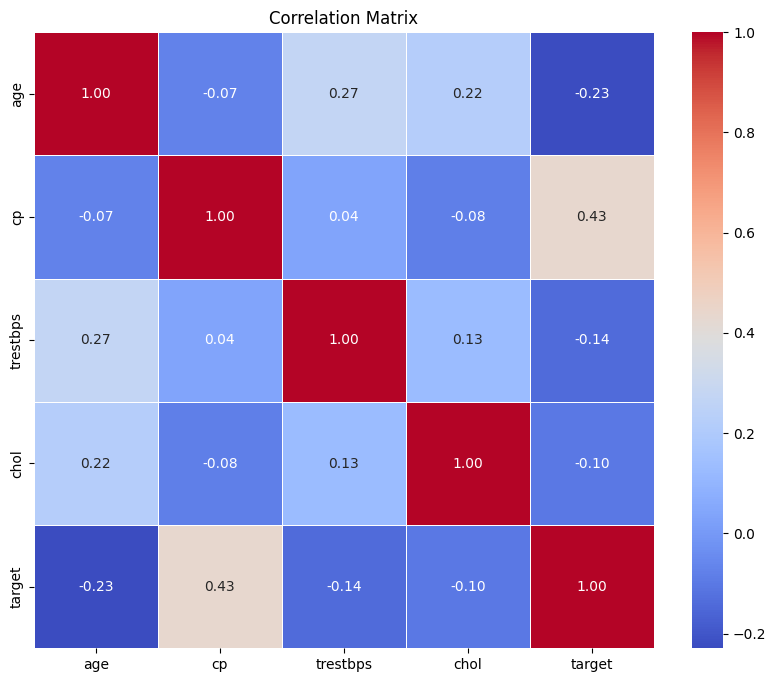

Correlation matrix:
               age        cp  trestbps      chol    target
age       1.000000 -0.071966  0.271121  0.219823 -0.229324
cp       -0.071966  1.000000  0.038177 -0.081641  0.434854
trestbps  0.271121  0.038177  1.000000  0.127977 -0.138772
chol      0.219823 -0.081641  0.127977  1.000000 -0.099966
target   -0.229324  0.434854 -0.138772 -0.099966  1.000000


In [28]:
# Convert 'cp' and 'target' to numeric if needed for correlation analysis
df['cp'] = df['cp'].astype(float)
df['target'] = df['target'].cat.codes

# Calculate the correlation matrix
correlation_matrix = df[['age', 'cp', 'trestbps', 'chol', 'target']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Print the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

Text(0.5, 1.02, 'Pair Plot of Selected Features')

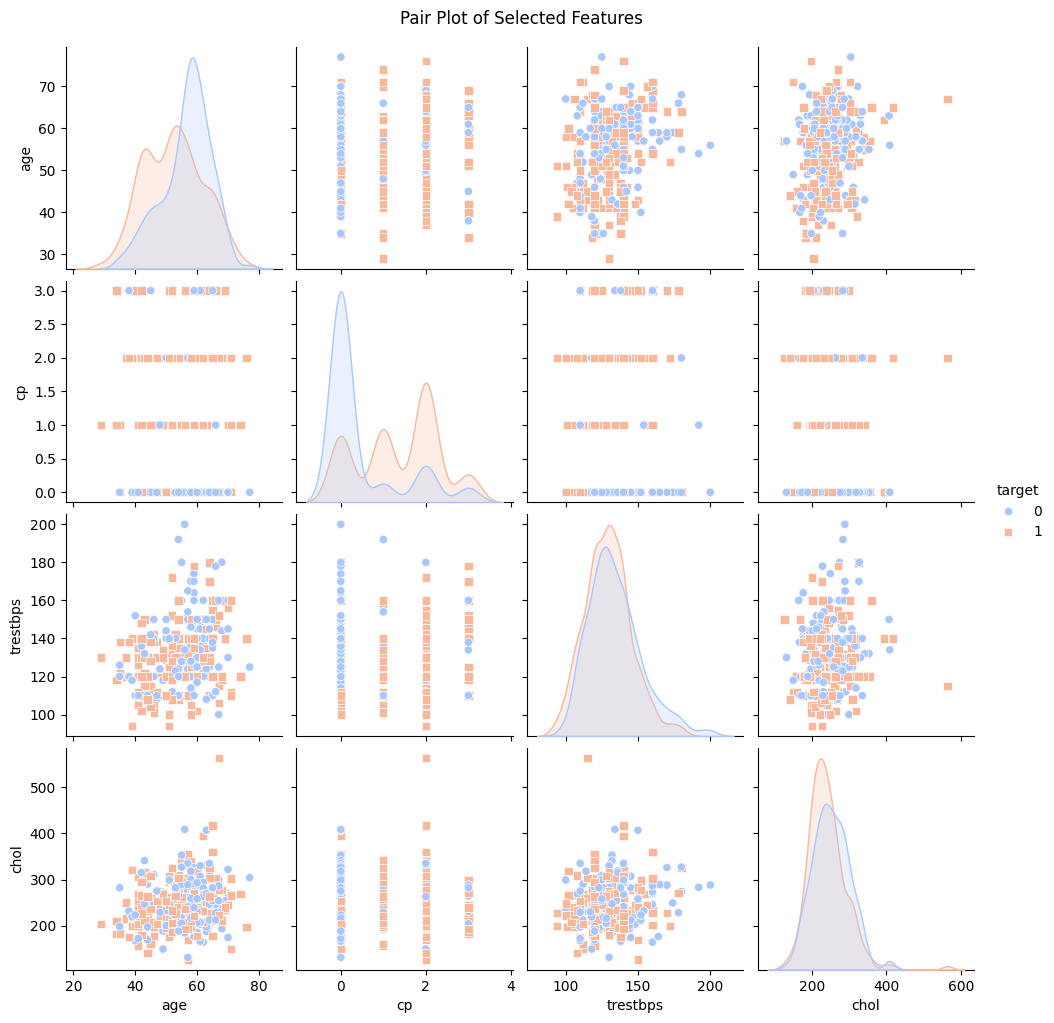

In [29]:

# Select features for pair plot
features = ['age', 'cp', 'trestbps', 'chol', 'target']

# Create pair plot
sns.pairplot(df[features], hue='target', palette='coolwarm', markers=["o", "s"], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)

**CONCLUSION**

In the given sample data the nummber of people with heart disease are 526 and without heart disease are 499

The given data has more number of people in old age group

It is seen that there are more people with typical angina (0) type of chest pain in every age group.

It is observed that people having asymptomatic (2) chest pain have a higher chance of heart diseases.

It is seen that male population has slightly higher BP

Here we observed that the blood pressure is normal from 30 to 50 and after 50 it increases gradually to age of 60. And after age of 55 it is fluctuating drastically.

Male population has higher cholesterol

It can be seen That the cholestrol level slightly starts increasing at the age after 45 It shows more flactualtion in male than female

In [30]:
# Export DataFrame to a CSV file
df.to_csv('heart_disease_dataset.csv', index=False)

print("DataFrame exported to heart_disease_dataset.csv")


DataFrame exported to heart_disease_dataset.csv
